In [0]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels


Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-73gi3efx
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-73gi3efx
  Stored in directory: /tmp/pip-ephem-wheel-cache-s0h93vhp/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


In [0]:
import statsmodels.api as sm

In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1lGtCEM-xnHGdjam4JKgzEzgHtXjWQB_1'})
download.GetContentFile('Data.zip')


In [0]:
!unzip Data.zip

Archive:  Data.zip
  inflating: ECE219_tweet_data/tweets_#gohawks.txt  
  inflating: ECE219_tweet_data/tweets_#gopatriots.txt  
  inflating: ECE219_tweet_data/tweets_#nfl.txt  
  inflating: ECE219_tweet_data/tweets_#patriots.txt  
  inflating: ECE219_tweet_data/tweets_#sb49.txt  
  inflating: ECE219_tweet_data/tweets_#superbowl.txt  


In [0]:
import pandas as pd
import json


In [4]:
Total_tweet=0
tweet_time=[]
follow_count=[]
retweet_count=[]

status_count=[]
hashtag_count=[]
friends_count=[]
mentions_TF=[]
favourites_count=[]
url_ratio_count=[]


with open('./ECE219_tweet_data/tweets_#gopatriots.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count.append(json_object['metrics']['citations']['total'])
    tweet_time.append(datetime_object)
    
    ### new features:
    status_count.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF.append(0)
    else:
      mentions_TF.append(1)

    url_ratio_count.append(len(json_object['tweet']['entities']['urls']))
    favourites_count.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

True

In [5]:
print(len(status_count))
print(len(retweet_count))
print(len(friends_count))
# print(len(mentions_count))


print((status_count[0:100]))
print(hashtag_count[0:100])
print(friends_count[0:100])
print(mentions_TF[0:100])
print(favourites_count[0:100])

print(url_ratio_count[0:100])
print(len(url_ratio_count))


23511
23511
23511
[31129, 19758, 11772, 2190, 22329, 2190, 31485, 7057, 5326, 5507, 15453, 34003, 34004, 8624, 22547, 16085, 23350, 7025, 488, 95, 567, 12378, 6802, 46510, 3248, 6144, 28471, 12516, 1188, 12552, 3562, 5331, 2, 2326, 31503, 2660, 31012, 9421, 26277, 1471, 6401, 31509, 31511, 1883, 703, 2595, 31515, 12591, 21268, 60, 3310, 7939, 2028, 517, 18827, 1, 2450, 62781, 30551, 272, 89843, 6917, 8126, 703, 4319, 463, 31540, 1071, 3140, 4752, 1104, 7368, 8290, 12967, 5061, 7328, 515, 7331, 24788, 503, 8642, 2837, 1050, 17779, 7970, 109, 115506, 5335, 67, 1340, 4386, 12646, 2865, 31556, 5707, 220, 36288, 470, 21185, 3159]
[2, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 4, 1, 3, 4, 4, 2, 1, 1, 3, 1, 2, 1, 2, 2, 1, 2, 1, 1, 10, 2, 3, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 6, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 4, 5, 1, 1, 8, 1, 1, 2, 3, 3, 2, 4, 1, 3, 2, 3, 5, 2, 1, 1, 1, 5, 1, 3, 2, 1, 2, 5, 7, 2, 2, 3, 2, 1]
[2948, 98, 2199, 73, 248, 73, 3021, 217, 330, 568, 248, 1372, 137

In [6]:
import pytz
import numpy as np
from datetime import timedelta



sortTime= np.sort(tweet_time, axis=0)


mint=datetime.datetime.fromtimestamp(sortTime[0])
maxt=datetime.datetime.fromtimestamp(sortTime[-1])
timerange=maxt-mint
print("True range in hour: ",timerange.total_seconds()/(60*60))
total_time_range= timerange.total_seconds()/(60*60)
print("Average number of tweets per hour", len(tweet_time)/total_time_range)







pst_tz = pytz.timezone('America/Los_Angeles')

min_tweet_time= np.min(tweet_time)



minute_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).minute
second_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).second

timeD=timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min)
# print(timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min))
# print(datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD)

min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD
# print(min_time_conv)

tweet_window=[]
for element in tweet_time:
  element_conv= datetime.datetime.fromtimestamp(element, pst_tz)
  
  bin_index=(element_conv-min_time_conv).total_seconds()/(60*60)
#   print(element_conv,datetime.datetime.fromtimestamp(sortTime[0]))
#   print(int(bin_index))
  tweet_window.append(int(bin_index))
  
  
# print(np.max(tweet_window))
# print((tweet_window))
# np.where(np.asarray(tweet_window,dtype=int)==0)
retweet_array_window=[]
for i in range(np.max(tweet_window)+1):
#   print(np.where(np.asarray(tweet_window,dtype=int)==i))
  retweet_array_window.append(np.where(np.asarray(tweet_window,dtype=int)==i))
#   break

True range in hour:  574.0733333333334
Average number of tweets per hour 40.95469800606194


In [7]:
# print(retweet_array_window[0][0][0])
# print(retweet_array_window)
my_retweet_count=[]
my_follow_count=[]
my_max_follower_count=[]
my_time_of_day=[]

my_status_count=[] #get how many status in certain hour
my_hashtag_count=[] #get how many hashtags in certain hour
my_friends_count=[] #max friend count
my_mentions_TF=[] #
my_favourites_count=[]
num_tweet=[]
for element in retweet_array_window:
  for innerelement in element:
#     print(innerelement)[]
    item=0
    item1=0
    maxitem2=0
    timeitem=0
    
    item_status=0
    item_hashtag=0
    item_friends=0
    item_mentions=0
    item_favourites=0
    item_tweet=0
    for indexlayer in innerelement:
      
      item_tweet+=1
      item=retweet_count[indexlayer]+item
      item1=follow_count[indexlayer]+item1
      timeitem=datetime.datetime.fromtimestamp(tweet_time[indexlayer], pst_tz).hour
      
      item_status= status_count[indexlayer]+ item_status
      item_hashtag=hashtag_count[indexlayer]+ item_hashtag
      item_friends=item_friends+ friends_count[indexlayer]
      item_mentions=item_mentions+ mentions_TF[indexlayer]
      item_favourites=item_favourites+ favourites_count[indexlayer]
      
      
      
      
      if maxitem2 < follow_count[indexlayer]:
        maxitem2= follow_count[indexlayer]
    my_time_of_day.append(timeitem)   
    my_max_follower_count.append(maxitem2)  
    my_retweet_count.append(item)
    my_follow_count.append(item1)
    
    my_status_count.append(item_status)
    my_hashtag_count.append(item_hashtag)
    my_friends_count.append(item_friends)
    my_mentions_TF.append(item_mentions)
    my_favourites_count.append(item_favourites)
    num_tweet.append(item_tweet)

n_tweet= np.histogram(tweet_window,bins=int(np.max(tweet_window))+1)
print(len(n_tweet[0]))            
print(len(my_retweet_count))
print(len(my_follow_count))
print(len(my_max_follower_count))
print(len(my_time_of_day))

df = pd.DataFrame({
    '# of Tweets' : num_tweet,
    '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
    'Max followers': my_max_follower_count,
    'Mentions': my_mentions_TF,
    'Status': my_status_count,
    'Hashtags': my_hashtag_count,
    'Friends': my_friends_count,
    'Favourites': my_favourites_count,
    'Time of day': my_time_of_day
    }, columns = ['# of Tweets', 
                  '# of retweets', 
                  'Sum n followers', 
                  'Max followers', 
                  'Mentions',
                  'Status', 
                  'Hashtags', 
                  'Friends', 
                  'Favourites',
                  'Time of day'])
# x=[n_tweet[0], my_retweet_count, my_follow_count, my_max_follower_count, my_status_count,my_hashtag_count]

575
575
575
575
575


In [8]:
df.head()

,# of Tweets,# of retweets,Sum n followers,Max followers,Mentions,Status,Hashtags,Friends,Favourites,Time of day
0,1,4,10955.0,10955.0,1,7057,1,217,348,1
1,1,3,1762.0,1762.0,0,5326,1,330,8,2
2,0,0,0.0,0.0,0,0,0,0,0,0
3,2,3,1168.0,600.0,1,20960,2,816,11954,4
4,1,2,34.0,34.0,1,31485,1,3021,8848,5


In [9]:


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Time of day'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# X_train, X_test, y_train, y_test = train_test_split(input_arr, output_arr, test_size=0.2, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()
print("PREDICTION",output_predicted)
print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)


# fig = plt.figure(figsize=(16,11))
# fig = sm.graphics.plot_partregress_grid(results, fig=fig)
# fig.show()
# # plot fitted values vs true values
# plt.figure(figsize=(16,11))
# plt.scatter(y_test, output_predicted, color='red', edgecolors='b')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4)
# plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
# plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
# plt.title('Fitted Values vs True Values', fontsize = 16)
# plt.show()

PREDICTION [ 1.01847106e+01  3.37766294e+00  3.71843884e+00 -9.57233661e+00
 -2.24056412e+00 -9.62676005e+01 -2.20373078e+00  3.57647242e+00
 -1.51427073e+01  2.69262466e+00  1.10977103e+01 -1.10813531e+01
  3.71843884e+00 -5.14132475e+01  5.88045871e+00  3.71843884e+00
 -6.48341378e+00 -4.01347073e+00  3.71843884e+00  9.11264436e-02
  3.71843884e+00  3.71843884e+00  3.71843884e+00 -3.19141038e+01
 -4.25429757e+00  4.92566852e+00  3.90726526e+00  5.49797928e+00
  1.68539112e+00  1.10898655e+01  1.36232429e+01  4.46839150e+00
  1.80962517e+00  9.13502856e+00 -2.82172195e+01 -4.27693112e+01
  7.14955633e+00  4.46755275e+00 -1.34848583e+01 -5.91821015e+01
 -1.05161738e+01  4.07495222e+00  6.59163791e+00 -1.24005842e+01
 -4.79781237e+00  1.74274203e+01  3.71843884e+00  2.66189175e+01
  3.71843884e+00  3.71843884e+00  3.71843884e+00  3.71843884e+00
 -1.41161492e+00  3.71843884e+00  3.71843884e+00 -2.08375627e-01
  2.04005546e+01  1.65329202e+00 -7.04494427e+01  4.35747256e+01
  3.73044549e+

In [0]:
df = pd.DataFrame({
    '# of Tweets' : n_tweet[0],
    '# of retweets' : my_retweet_count,
#     'Sum n followers': my_follow_count,
#     'Max followers': my_max_follower_count,
    'Mentions': my_mentions_TF,
    'Status': my_status_count,
#     'Hashtags': my_hashtag_count,
#     'Friends': my_friends_count,
    'Favourites': my_favourites_count,
#     'Time of day': my_time_of_day
    }, columns = [
                  '# of Tweets', 
#                   '# of retweets', 
#                   'Sum n followers', 
#                   'Max followers', 
                  'Mentions',
                  'Status', 
#                   'Hashtags', 
#                   'Friends', 
                  'Favourites',
#                   'Time of day'
                 ])

In [18]:
df.head()

,# of Tweets,Mentions,Status,Favourites
0,1,1,7057,348
1,1,0,5326,8
2,0,0,0,0
3,2,1,20960,11954
4,1,1,31485,8848


PREDICTION [-1.43104428e+00 -1.02788150e+01 -1.11528157e+01 -1.33398369e+01
 -7.78885928e+00 -5.57661595e+01 -9.30661548e+00 -8.21364380e+00
 -1.65946422e+01 -1.58025332e+00 -2.11129932e+00 -3.38227424e-01
 -1.11528157e+01 -3.33185313e+01 -2.24439316e+00 -1.11528157e+01
 -1.10310826e+01 -5.89515871e+00 -1.11528157e+01 -3.65601435e+00
 -1.11528157e+01 -1.11528157e+01 -1.11528157e+01 -2.68502750e+01
 -1.63786526e+01 -1.02779853e+01 -1.11524838e+01 -1.08256317e+01
 -3.27064916e+00  8.51290040e-01  8.48993390e-01  4.96113311e+00
 -9.27530482e+00 -2.22685915e+00 -1.42779468e+01 -2.74910644e+01
  3.55574519e-01 -3.35937679e+00 -1.41000641e+01 -1.84673176e+01
 -1.35029044e+01  9.77778835e-01  1.31976073e+00 -6.91397190e+00
 -1.15158146e+01  1.28442136e+01 -1.11528157e+01  1.08252494e+01
 -1.11528157e+01 -1.11528157e+01 -1.11528157e+01 -1.11528157e+01
 -9.34282445e+00 -1.11528157e+01 -1.11528157e+01 -4.89147139e+00
  1.25782691e+01 -1.06724243e+01 -5.06827139e+01  3.55324429e+01
  2.07978210e+

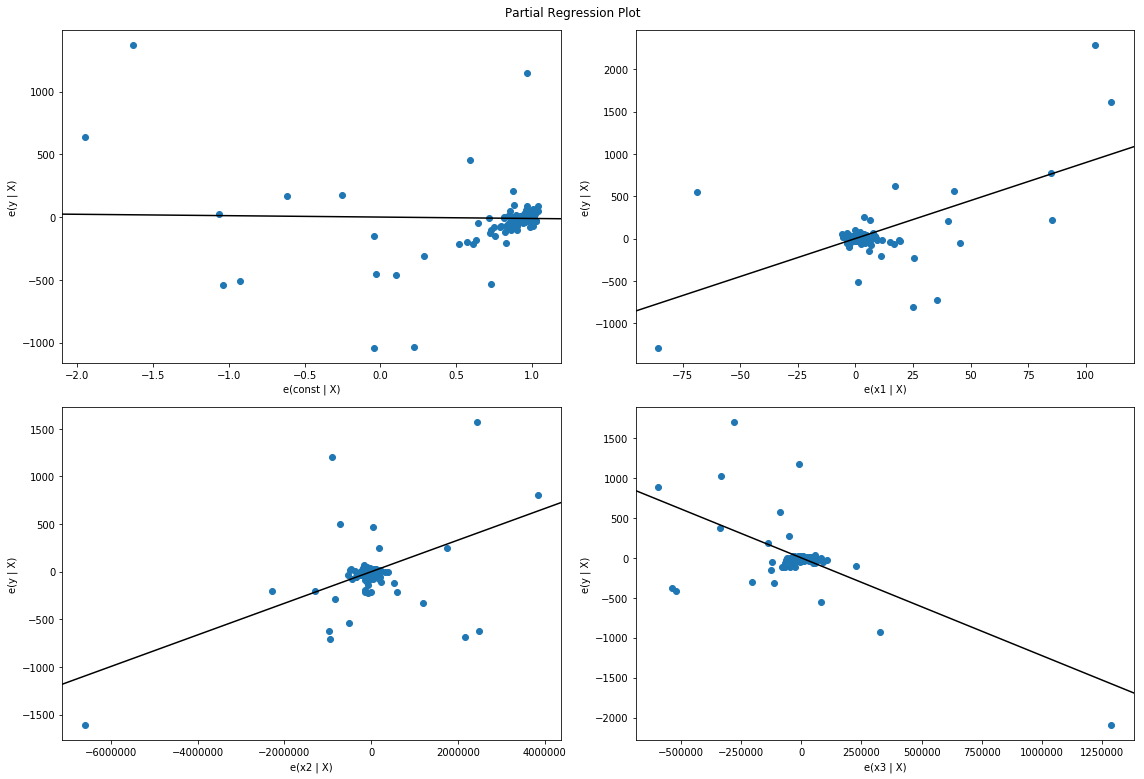

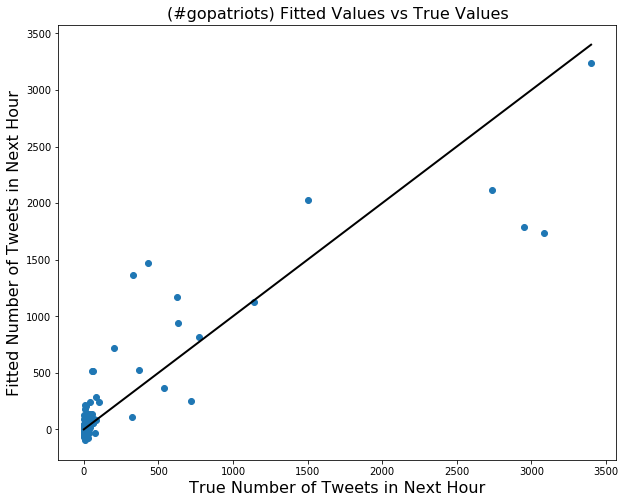

In [19]:


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, 'Mentions':'Favourites'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# X_train, X_test, y_train, y_test = train_test_split(input_arr, output_arr, test_size=0.2, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()
print("PREDICTION",output_predicted)
print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)


fig = plt.figure(figsize=(16,11))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
fig.show()
# plot fitted values vs true values
plt.figure(figsize=(10,8))
plt.scatter(output_arr, output_predicted)
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=2, color='black')
plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
plt.title('(#gopatriots) Fitted Values vs True Values', fontsize = 16)
plt.show()

In [13]:

print(np.argsort(res.pvalues))
len(res.pvalues)

[4 3 1 2 0]


5

In [14]:
res.pvalues

array([7.91349426e-01, 9.33570394e-44, 1.12324817e-01, 2.18318872e-44,
       8.30136853e-67])

In [0]:
# x1            -5.9692      0.679     -8.788      0.000      -7.303      -4.635
# x2            -0.6214      0.069     -8.998      0.000      -0.757      -0.486
# x3           5.25e-06   2.51e-05      0.209      0.835   -4.41e-05    5.46e-05
# x4         -3.624e-05      0.000     -0.309      0.758      -0.000       0.000
# x5          8.659e-05   4.64e-05      1.865      0.063   -4.58e-06       0.000
# x6             1.8496      0.253      7.313      0.000       1.353       2.346
# x7            -0.0038      0.001     -6.034      0.000      -0.005      -0.003
# x8            19.3173      2.130      9.069      0.000      15.134      23.501
# x9             0.0019      0.000      6.082      0.000       0.001       0.003
# x10          -22.1796     32.664     -0.679      0.497     -86.335      41.975